
# Regression

## Install packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 7.4MB 4.0MB/s eta 0:00:01    20% |██████▌                         | 1.5MB 19.9MB/s eta 0:00:01    34% |███████████                     | 2.5MB 19.1MB/s eta 0:00:01    48% |███████████████▍                | 3.6MB 22.5MB/s eta 0:00:01
    100% |████████████████████████████████| 12.2MB 3.5MB/s eta 0:00:01   14% |████▌                           | 1.7MB 21.5MB/s eta 0:00:01    31% |██████████                      | 3.8MB 20.6MB/s eta 0:00:01    57% |██████████████████▍             | 7.0MB 21.5MB/s eta 0:00:01    74% |████████████████████████        | 9.1MB 21.0MB/s eta 0:00:01    92% |█████████████████████████████▌  | 11.2MB 20.8MB/s eta 0:00:01
    100% |████████████████████████████████| 26.2MB 1.4MB/s eta 0:00:01  0% |▎                               | 256kB 20.5MB/s eta 0:00:02    8% |██▊                             | 2.2MB 19.1MB/s eta 0:00:02    12% |████                            | 3.3MB 21.5MB/s eta 0:00:02    20% |██████▌                  

In [2]:
import pandas as pd
import numpy as np
import os
import helper
import quiz_tests
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Simulate two stock prices


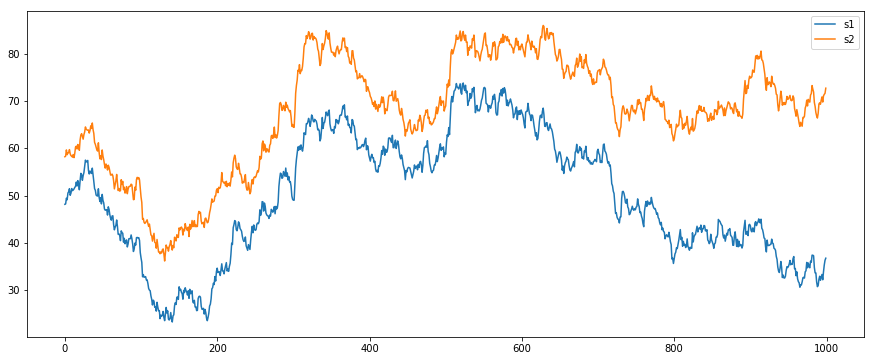

In [3]:
# just set the seed for the random number generator
np.random.seed(100)
# use returns to create a price series
drift = 100
r0 = pd.Series(np.random.normal(0, 1, 1000))
s0 = pd.Series(np.cumsum(r0), name='s0') + drift

noise1 = np.random.normal(0, 0.4, 1000)
drift1 = 50
r1 = r0 + noise1
s1 = pd.Series(np.cumsum(r1), name='s1') + drift1

noise2 = np.random.normal(0, 0.4, 1000)
drift2 = 60
r2 = r0 + noise2
s2 = pd.Series(np.cumsum(r2), name='s2') + drift2

pd.concat([s1, s2], axis=1).plot(figsize=(15,6))
plt.show()

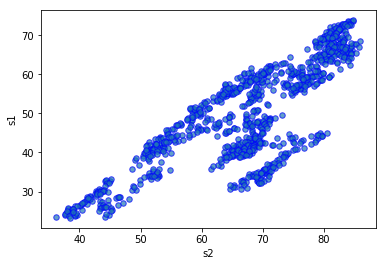

In [4]:
## Plot data with scatterplot
sc = plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.7)
plt.xlabel('s2')
plt.ylabel('s1');

In [5]:
from sklearn.linear_model import LinearRegression

## Quiz: Linear Regression

Note that the LinearRegression().fit() expects 2D numpy arrays.  Since s1 and s2 are pandas series, we can use Series.values to get the values as a numpy array. Since these are 1D arrays, we can use numpy.reshape(-1,1) to make these 1000 row by 1 column 2 dimensional arrays.  

The coefficients of the linear regression, $\beta$ and $intercept$ for the regression line:  
$y = \beta \times x + intercept$  
Can be obtained after fitting to the data.  Use `LinearRegression.coef_` for the slope (beta coefficients) and `LinearRegression.intercept_` for the intercept.  You may want to practice accessing these outside of the function definition, to see if you'll need additional brackets `[]` to access the values.

In [14]:
def regression_slope_and_intercept(xSeries, ySeries):
    """
    xSeries: pandas series, x variable
    ySeries: pandas series, y variable
    """
    lr = LinearRegression()
    
    #TODO: get the values from each series, reshape to be 2 dimensional
    #set s1 to the x variable, s2 to the y variable
    xVar = xSeries.values.reshape((-1,1))
    yVar = ySeries.values.reshape((-1,1))
    lr.fit(xVar, yVar)
    
    #TODO: call LinearRegression.fit().  Pass in the x variable then y variable
  
    
    #TODO: obtain the slope and intercept
    slope =  lr.coef_[0][0]
    intercept =  lr.intercept_[0]
    
    return (slope, intercept)

quiz_tests.test_regression_slope_and_intercept(regression_slope_and_intercept);

Tests Passed


In [15]:
slope, intercept = regression_slope_and_intercept(s1,s2);
print(f"slope {slope:.2f} and intercept {intercept:.2f}")

slope 0.74 and intercept 30.62


### Plot the fitted regression line over the scatterplot

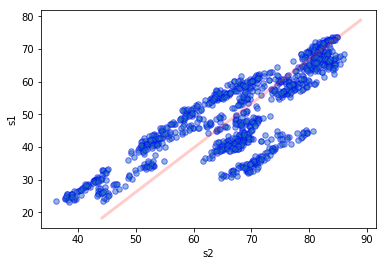

In [16]:
plt.scatter(s2, s1, s=30, edgecolor='b', alpha=0.5);
x = np.linspace(s1.min()-5, s1.max()+5, 2)
yPred = slope * x + intercept
plt.plot(yPred,x, alpha=0.2, lw=3, color='r')
plt.xlabel('s2')
plt.ylabel('s1');

If you're stuck, you can also check out the solution [here](regression_solution.ipynb)